# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_merge = pd.merge(mouse_metadata, study_results)

# Display the data table for preview

mouse_merge.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice.

total_mice = mouse_merge["Mouse ID"].nunique()

total_mice

249

In [2]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dupes_df = mouse_merge[mouse_merge.duplicated(['Mouse ID', 'Timepoint'], keep=False)]


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = dupes_df['Mouse ID'].unique()

duplicate_mouse_data = mouse_merge[mouse_merge['Mouse ID'].isin(duplicate_mouse_id)]


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_merge = mouse_merge.drop_duplicates(['Mouse ID', 'Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.

mouse_merge.to_csv("./mouse_merge.csv", index=False)

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_analysis = mouse_merge.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean_tumor = drug_analysis.mean()

median_tumor = drug_analysis.median()

variance_tumor = drug_analysis.var()

std_dev_tumor = drug_analysis.std()

SEM_tumor = drug_analysis.sem()

DA_summary = pd.DataFrame({
    'Mean': mean_tumor,
    'Median': median_tumor,
    'Variance': variance_tumor,
    "Standard Deviation": std_dev_tumor,
    'SEM': SEM_tumor
})

print(DA_summary)






                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Group the data by 'Drug Regimen' and calculate the required statistics in a single line
summary_df = drug_analysis.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary DataFrame
print(summary_df)

AttributeError: 'SeriesGroupBy' object has no attribute 'groupby'

## Bar and Pie Charts

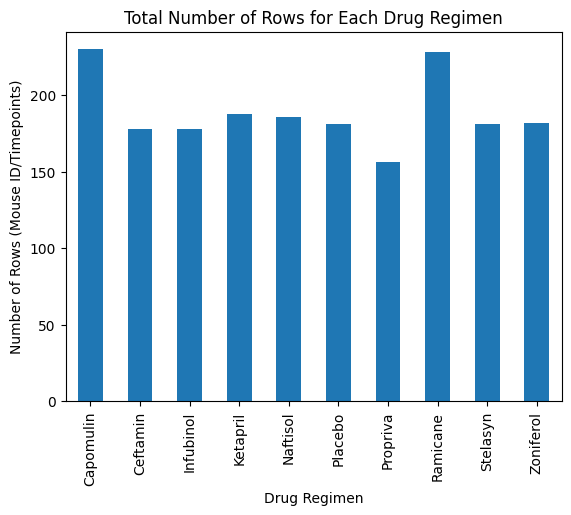

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


drug_regimen_counts = mouse_merge.groupby('Drug Regimen').size()

# Generate the bar plot
drug_regimen_counts.plot.bar()

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

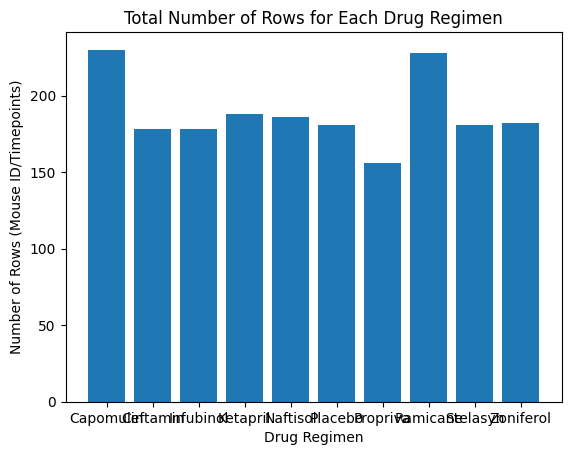

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(drug_regimen_counts.index, drug_regimen_counts)

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()



<Axes: >

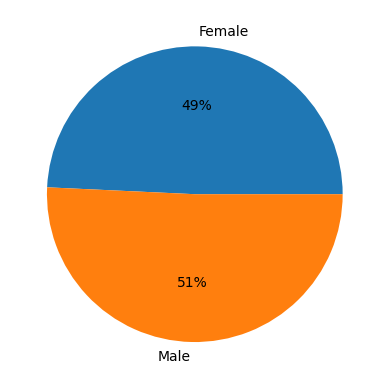

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sexes = mouse_merge.groupby("Sex").size()

sexes.plot.pie(y="Sex", autopct='%1.0f%%')

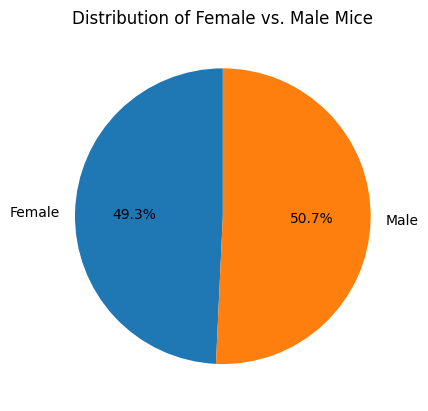

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Generate the pie plot using pyplot
plt.pie(sexes, labels=sexes.index, autopct='%1.1f%%', startangle=90)

# Set plot title
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = mouse_merge[mouse_merge['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints.reset_index(), mouse_merge, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    # Determine outliers using upper and lower bounds
outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

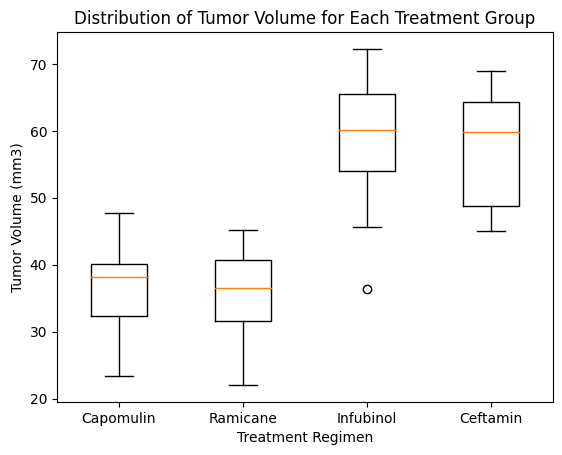

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)

plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

plt.show()

## Line and Scatter Plots

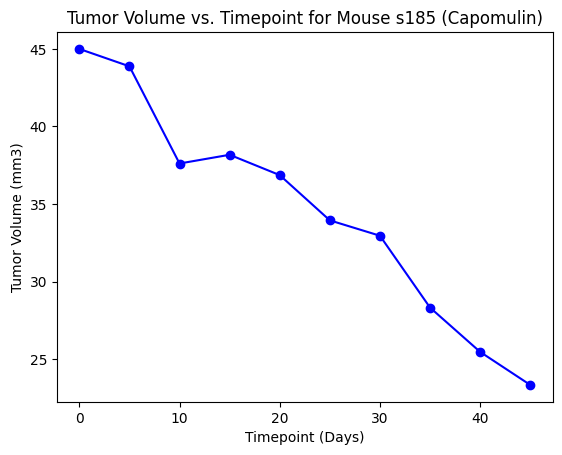

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

selected_mouse = 's185'
capomulin_data = mouse_merge[(mouse_merge['Drug Regimen'] == 'Capomulin') & (mouse_merge['Mouse ID'] == selected_mouse)]

plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Timepoint for Mouse {selected_mouse} (Capomulin)')

plt.show()

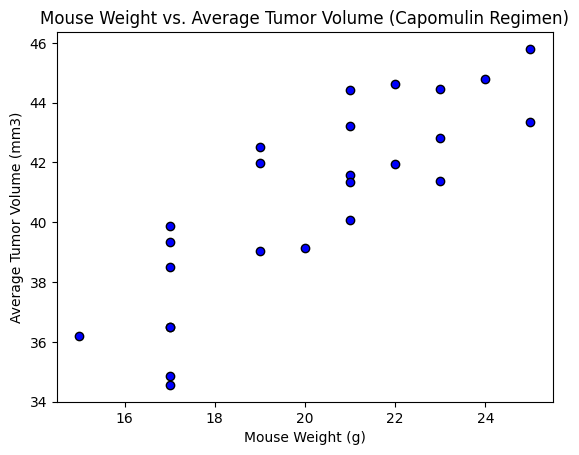

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_merge[mouse_merge['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

plt.show()

## Correlation and Regression

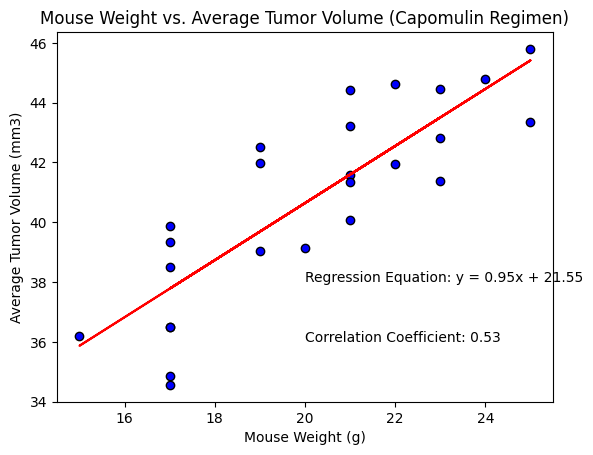

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_merge[mouse_merge['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

correlation_coefficient = capomulin_data['Weight (g)'].corr(capomulin_data['Tumor Volume (mm3)'])

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)

plt.scatter(mouse_weights, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

regress_values = slope * mouse_weights + intercept
plt.plot(mouse_weights, regress_values, 'r-')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

plt.annotate(f'Correlation Coefficient: {correlation_coefficient:.2f}', (20, 36), color='black')
plt.annotate(f'Regression Equation: y = {slope:.2f}x + {intercept:.2f}', (20, 38), color='black')

plt.show()